
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


### Learning Objective

At the end of the experiment, you will be able to :

* Perform SVM linear classifier

### Dataset

#### Description

The dataset consists of the below 7 columns,

- **species:** penguin species (Chinstrap, Adélie, or Gentoo)
- **culmen length & depth:** The culmen is the upper ridge of a bird's beak
- **flipper_length_mm:** flipper length
- **body_mass_g:** body mass
- **island:** island name (Dream, Torgersen, or Biscoe)
- **sex:** penguin sex

### Setup Steps:

In [39]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2302815" #@param {type:"string"}

In [40]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "+6592721549" #@param {type:"string"}

In [41]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "U1W4_16_SVM_Linear_Classifier_Penguins_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Penguin.csv")
    display(HTML('<script src="https://staging.dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml-iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import required packages

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Load the data

In [43]:
data = pd.read_csv("/content/Penguin.csv")
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [44]:
# YOUR CODE HERE: To Drop the NaN values from the data
data = data.dropna()


In [45]:
data.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

###From the given data, we will select the 'culmen_depth_mm' and 'flipper_length_mm' features for the Gento and Chinstrap species as they are linearly separable

In [46]:
# Create a small dataset for SVM classification, consisting of culmen_depth_mm and flipper_length_mm from Gento and Chinstrap

df = data[(data['species']!='Adelie')]
df = df[['culmen_depth_mm','flipper_length_mm', 'species']]
df.head()

# Above we have selected only Gento and Chinstrap and not Adelie (!='Adelie')

,culmen_depth_mm,flipper_length_mm,species
152,17.9,192.0,Chinstrap
153,19.5,196.0,Chinstrap
154,19.2,193.0,Chinstrap
155,18.7,188.0,Chinstrap
156,19.8,197.0,Chinstrap


### Convert categorical values to numerical targets and plot the graph for Gento and Chinstrap species

     culmen_depth_mm  flipper_length_mm
152             17.9              192.0
153             19.5              196.0
154             19.2              193.0
155             18.7              188.0
156             19.8              197.0
..               ...                ...
338             13.7              214.0
340             14.3              215.0
341             15.7              222.0
342             14.8              212.0
343             16.1              213.0

[187 rows x 2 columns]


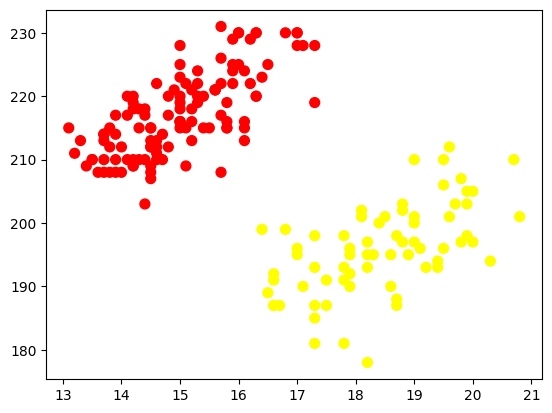

In [47]:
# Convert categorical values to numerical targets
df = df.replace('Gentoo', 0)
df = df.replace('Chinstrap', 1)

# Assign data to 'X' and labels to 'y'
X1 = df.iloc[:, :2]
print(X1)
y1 = df['species']

# View the scatter plot
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y1, s=50, cmap='autumn')
plt.show()

### Splitting the data into train and test sets

In [48]:
# YOUR COIDE HERE: To split the data into train and test
from sklearn.model_selection import train_test_split
X = data.drop(columns=['species'])  # Features
y = data['species']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [49]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(266, 6) (266,)
(67, 6) (67,)


### Train a SVM Linear Classifier

In [50]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [51]:
# YOUR CODE HERE: To train svm linear classifier

# Train the classifier on the training data
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Biscoe'

### View the coordinates of the support vectors and Visualize them

In [ ]:
model.support_vectors_

In [ ]:
# Visualize the support vectors in the plot
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y1, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1])

In [ ]:
#@title ### Visualize the coefficients of the hyperplane that maximize the margin
ax = plt.gca()
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y1, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### From the above dataset we will select the 'culmen_depth_mm' and 'flipper_length_mm' features for the Gento and Adelie species as they are linearly separable

In [ ]:
df2 = data[data['species'].isin(['Gentoo', 'Adelie'])][['culmen_depth_mm', 'flipper_length_mm']]
# YOUR CODE HERE:

### Convert categorical values to numerical targets and plot the graph for Gento and Adelie species

In [ ]:
# YOUR CODE HERE: convert categorical values to numerical targets

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Convert the 'species' column to numerical targets
data['species_encoded'] = label_encoder.fit_transform(data['species'])

# Display the encoded species column
print(data['species_encoded'].head())
# YOUR CODE HERE: Assign data to 'X' and labels to 'y'

X = data[['culmen_depth_mm', 'flipper_length_mm']]

# Assign labels to 'y'
y = data['species']
import matplotlib.pyplot as plt

# Plot the scatter plot
plt.scatter(X['culmen_depth_mm'], X['flipper_length_mm'], c=y, cmap='viridis')
plt.xlabel('Culmen Depth (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Scatter Plot of Culmen Depth vs Flipper Length')
plt.colorbar(label='Species')
plt.show()


### Splitting the data into train and test sets

In [ ]:
X = data.drop(columns=['species'])  # Features
y = data['species']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# YOUR CODE HERE: Split the data into train and test

In [ ]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

### Train a SVM Linear Classifier

In [ ]:
# YOUR CODE HERE: To train svm linear classifier
from sklearn.svm import LinearSVC

# Create the linear SVM classifier object
svm_classifier = LinearSVC()

# Train the classifier on the training data


### Visualize the support vectors in the plot


In [ ]:
model.support_vectors_

In [ ]:
# YOUR CODE HERE: To Visualize the support vectors in the plot
import numpy as np
from sklearn.svm import LinearSVC
# Get the support vectors from the trained SVM classifier
support_vectors = svm_classifier.support_vectors_

# Plot the scatter plot
plt.scatter(X['culmen_depth_mm'], X['flipper_length_mm'], c=y, cmap='viridis')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('Culmen Depth (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Scatter Plot of Culmen Depth vs Flipper Length with Support Vectors')
plt.colorbar(label='Species')
plt.legend()
plt.show()

NameError: name 'X2' is not defined

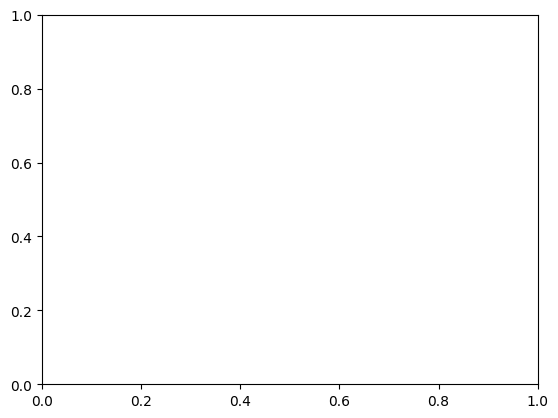

In [53]:
#@title ### Visualize the coefficients of the hyperplane that maximize the margin
ax = plt.gca()
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y2, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### Please answer the questions below to complete the experiment:




In [54]:
#@title In the SVM algorithm, the support vectors try to find the best hyperplane that separates the classes? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "TRUE" #@param ["","TRUE", "FALSE"]


In [55]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Was Tough, but I did it" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [56]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "na" #@param {type:"string"}


In [57]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [58]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [59]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [60]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [61]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4404
Date of submission:  24 May 2024
Time of submission:  17:37:11
View your submissions: https://aiml-iiith.talentsprint.com/notebook_submissions
